# Chapter 2.  Probability Distributions

In [1]:
options(warn=-1)
library(ggsci)
library(mvtnorm)
library(repr)

## 2.1 Binary Variables

### 2.1.1 The beta distributions

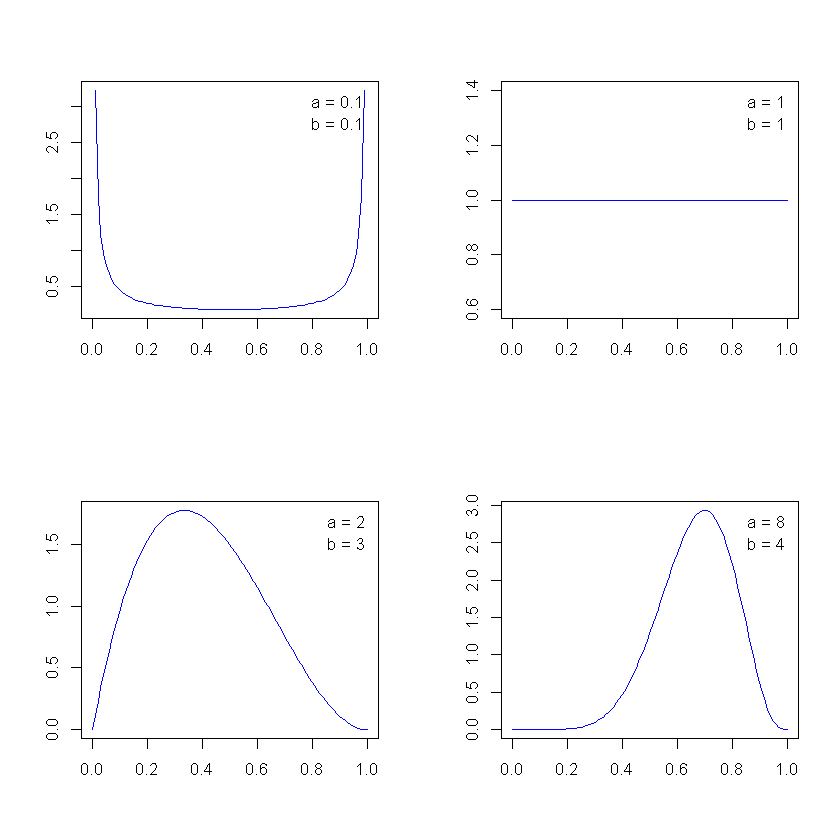

In [2]:
x <- seq(0,1,0.01)

beta.pdf <- function(a, b, mu){
        mu^(a-1)*(1-mu)^(b-1)*gamma(a+b)/(gamma(a)*gamma(b))        
}

par(mfrow=c(2,2))
y <- beta.pdf( 0.1, 0.1, x)
plot(x,y,type = "l", xlab="", ylab="",col="blue")
legend("topright", c("a = 0.1","b = 0.1"),bty = "n")


y <- beta.pdf( 1, 1, x)
plot(x,y,type = "l", xlab="", ylab="",col="blue")
legend("topright", c("a = 1","b = 1"),bty = "n")

y <- beta.pdf( 2, 3, x)
plot(x,y,type = "l", xlab="", ylab="",col="blue")
legend("topright", c("a = 2","b = 3"),bty = "n")

y <- beta.pdf( 8, 4, x)
plot(x,y,type = "l", xlab="", ylab="",col="blue")
legend("topright", c("a = 8","b = 4"),bty = "n")

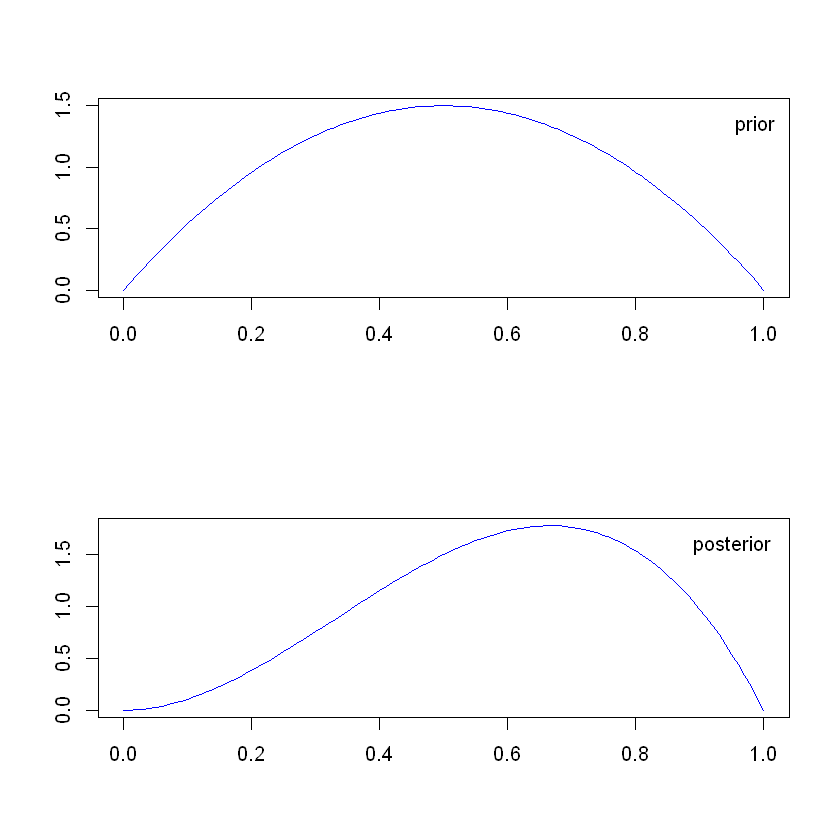

In [3]:
par(mfrow=c(2,1))
y <- beta.pdf( 2, 2, x)
plot(x,y,type = "l", xlab="", ylab="",col="blue")
legend("topright", c("prior"),bty = "n")

# a, b the hyperparameter of prior beta distribution
Bernoulli.bayes <- function(X, mu, a, b){
        n_ones = sum(X == 1)
        n_zeros = sum(X == 0)
        a <- a +　n_ones
        b <- b +　n_zeros
        beta.pdf( a, b, mu)        
}

X <- c(1)
x <- seq(0,1,0.01)
mu <- x
y <- Bernoulli.bayes( X, x, 2, 2)
plot(x,y,type = "l", xlab="", ylab="",col="blue")
legend("topright", c("posterior"),bty = "n")

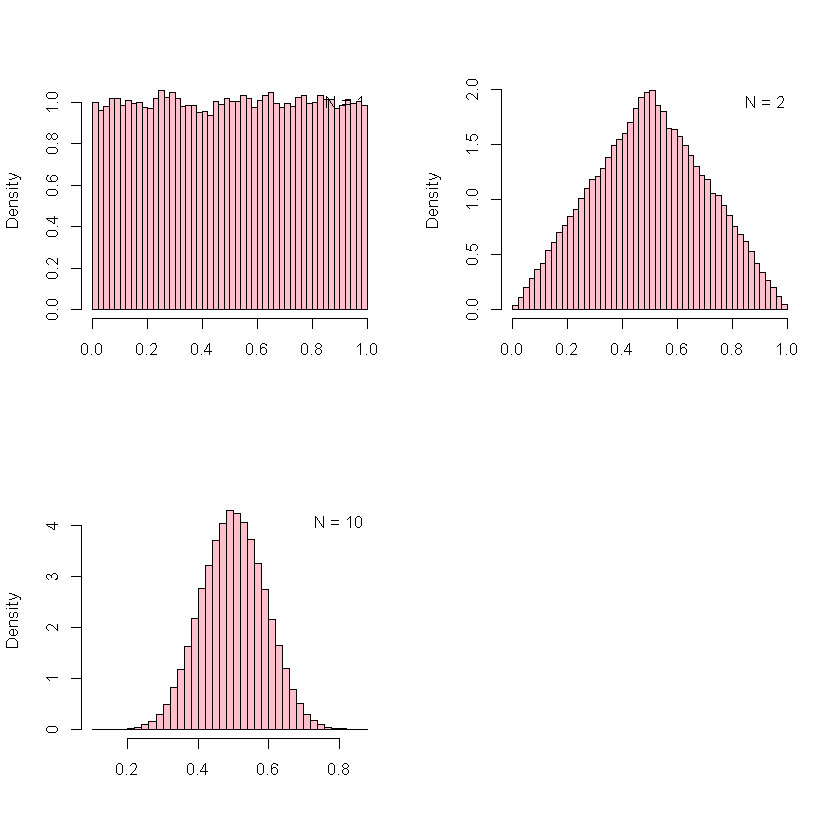

In [4]:
par(mfrow=c(2,2))
unif_rv <- runif(100000, min=0, max=1) 
unif_rv2 <- runif(100000, min=0, max=1)


hist(unif_rv,freq=FALSE, xlab="", main= "",breaks = 50, col = "pink")
legend("topright", c("N = 1"),bty = "n")

hist(1/2*(unif_rv+unif_rv2),freq=FALSE, xlab="", main= "",breaks = 50, col = "pink")
legend("topright", c("N = 2"),bty = "n")

n = 9
unif_rv_10 = runif(100000, min=0, max=1)
for(i in 1:n){
        unif_rv_10 = unif_rv_10 + runif(100000, min=0, max=1)
}

hist(1/10*unif_rv_10,freq=FALSE, xlab="", main= "",breaks = 50, col = "pink")
legend("topright", c("N = 10"),bty = "n")


## 2.2 Multinomial Variables

### 2.3.6 Bayesian inference for the Gaussian

$post_mu
[1] 0.2170781

$post_var
[1] 0.05

$post_mu
[1] 0.4579521

$post_var
[1] 0.03333333

$post_mu
[1] 0.6729736

$post_var
[1] 0.009090909

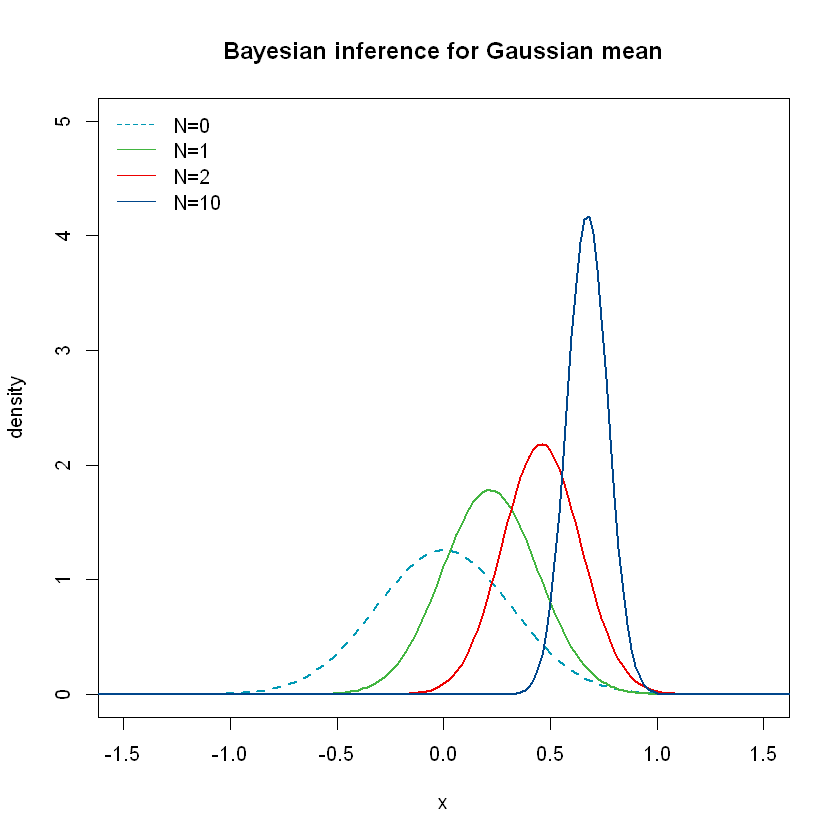

In [5]:
# # Suppose that the variance is known and we wish to infer the mean
Gaussian_mu_bayes <- function(data, data_var, prior_mu, prior_var){
        n = length(data)
        data_mu = mean(data)
        post_var = data_var * prior_var / (data_var + n * prior_var)
        post_mu = post_var * (prior_mu / prior_var + n* data_mu/ data_var)
        result <- list("post_mu"= post_mu, "post_var" = post_var)
        return(result)
        
}


Gaussian_pdf <- function(X, post_var, post_mu){
        
        result <- exp(-0.5 / post_var * (X-post_mu) ** 2) / sqrt(2 * pi * post_var)
        return(result)
}


# The data points are generated from a Gaussian of mean 0.8 and variance 0.1,
# and the prior is chosen to have mean 0. 
# The curves show the prior distribution over µ (the curve labelled N =0), which in this case is itself Gaussian, 
# along with the posterior distribution given by (2.140) for increasing numbers N of data points. 

x <- seq(-2, 2, by=0.02)
y=Gaussian_pdf(x, post_var=0.1, post_mu=0)
pal = rev(pal_lancet("lanonc")(4))
plot(x, y, type = "l", col = pal[1],main="Bayesian inference for Gaussian mean",
     lty = 2, xlim = c(-1.5, 1.5), ylim = c(0, 5), ylab = "density", lwd = 2)

#  fit 1 data point
data1 <- rnorm(1, mean = 0.8, sd = sqrt(0.1))
x1_bayes <- Gaussian_mu_bayes(data1, data_var = 0.1, prior_mu = 0, prior_var=0.1)
x1_bayes
y=Gaussian_pdf(x, x1_bayes$post_var, x1_bayes$post_mu)
lines(x, y,  type = "l", col = pal[2], lwd = 2)

#  fit 2 data point
data2 <- rnorm(1, mean = 0.8, sd = sqrt(0.1))
x2_bayes <- Gaussian_mu_bayes(data2, data_var = 0.1, prior_mu = x1_bayes$post_mu, prior_var = x1_bayes$post_var)
x2_bayes
y=Gaussian_pdf(x, x2_bayes$post_var, x2_bayes$post_mu)
lines(x, y,  type = "l", col = pal[3], lwd = 2)

#  fit 10 data point
data8 <- rnorm(8, mean = 0.8, sd = sqrt(0.1))
x8_bayes <- Gaussian_mu_bayes(data8, data_var = 0.1, prior_mu = x2_bayes$post_mu, prior_var = x2_bayes$post_var)
x8_bayes
y=Gaussian_pdf(x, x8_bayes$post_var, x8_bayes$post_mu)
lines(x, y,  type = "l", col = pal[4], lwd = 2)

legend("topleft", col = pal,
       lty = c(2, 1, 1, 1), bty = "n",
       legend = c("N=0", "N=1", "N=2", "N=10"))



### 2.3.6 Gamma distribution 

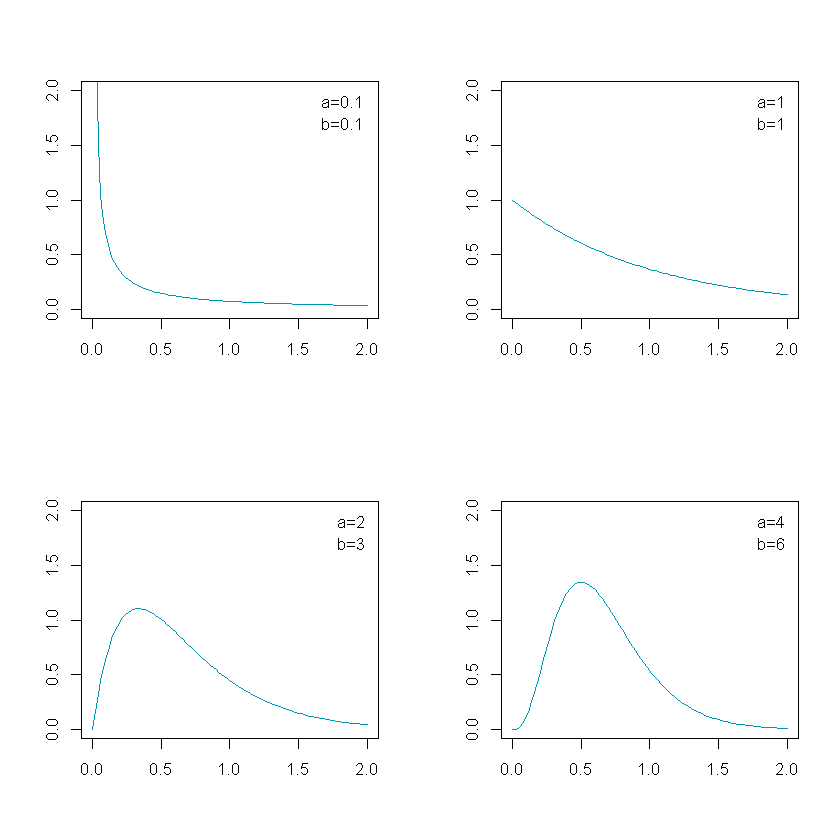

In [6]:
# Suppose that the mean is known and we wish to infer the variance.
# The corresponding conjugate prior should therefore be proportional to the product of a power of precision(tau) 
# and the exponential of a linear function of precision. 
# This corresponds to the gamma distribution 


Gamma_pdf <- function(X, a, b){
        b^a * X^(a-1) * exp(-b*X) / gamma(a)
}

x <- seq(0, 2, by=0.02)
y <- Gamma_pdf(x, 0.1, 0.1)
par(mfrow=c(2,2))
plot(x, y, type = "l", col = pal[1],
     xlim = c(0, 2), ylim = c(0, 2), xlab="", ylab="")
legend("topright", c("a=0.1", "b=0.1"),bty = "n")

y <- Gamma_pdf(x, 1, 1)
plot(x, y, type = "l", col = pal[1],
     xlim = c(0, 2), ylim = c(0, 2), xlab="", ylab="")
legend("topright", c("a=1", "b=1"),bty = "n")

y <- Gamma_pdf(x, 2, 3)
plot(x, y, type = "l", col = pal[1],
     xlim = c(0, 2), ylim = c(0, 2), xlab="", ylab="")
legend("topright", c("a=2", "b=3"),bty = "n")


y <- Gamma_pdf(x, 4, 6)
plot(x, y, type = "l", col = pal[1],
     xlim = c(0, 2), ylim = c(0, 2), xlab="", ylab="")
legend("topright", c("a=4", "b=6"),bty = "n")


### 2.3.7 Student's t-distribution

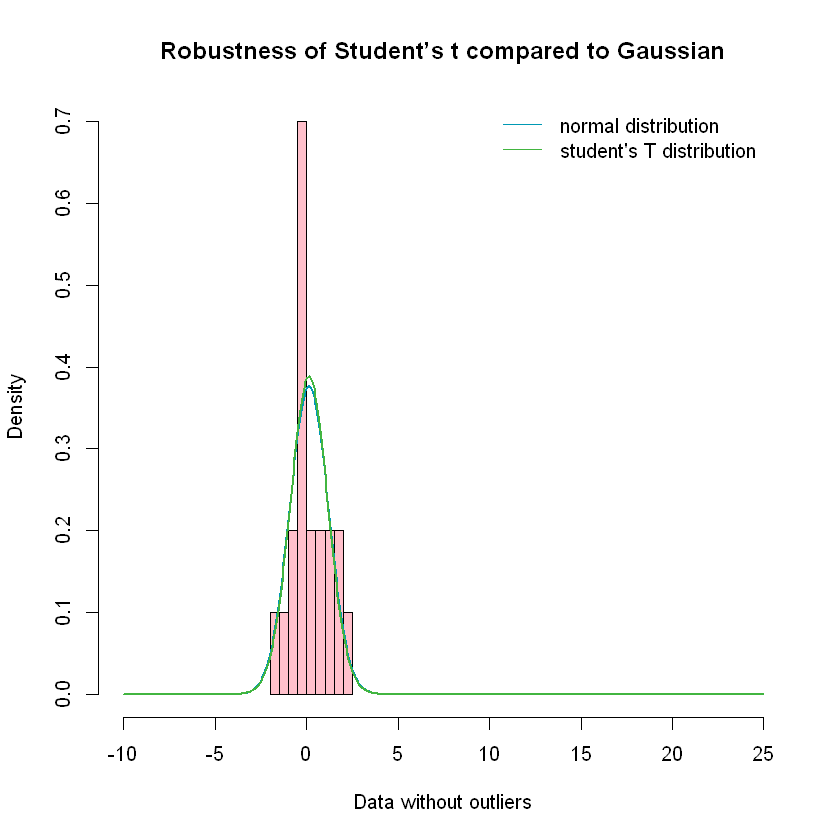

[1] "Gaussian_mle result"


$mean
[1] 2.759813

$var
[1] 49.10802

[1] "Student T fit"


$mu
[1] -0.0555631

$tau
[1] 1.738439

$dof
[1] 0.8715901

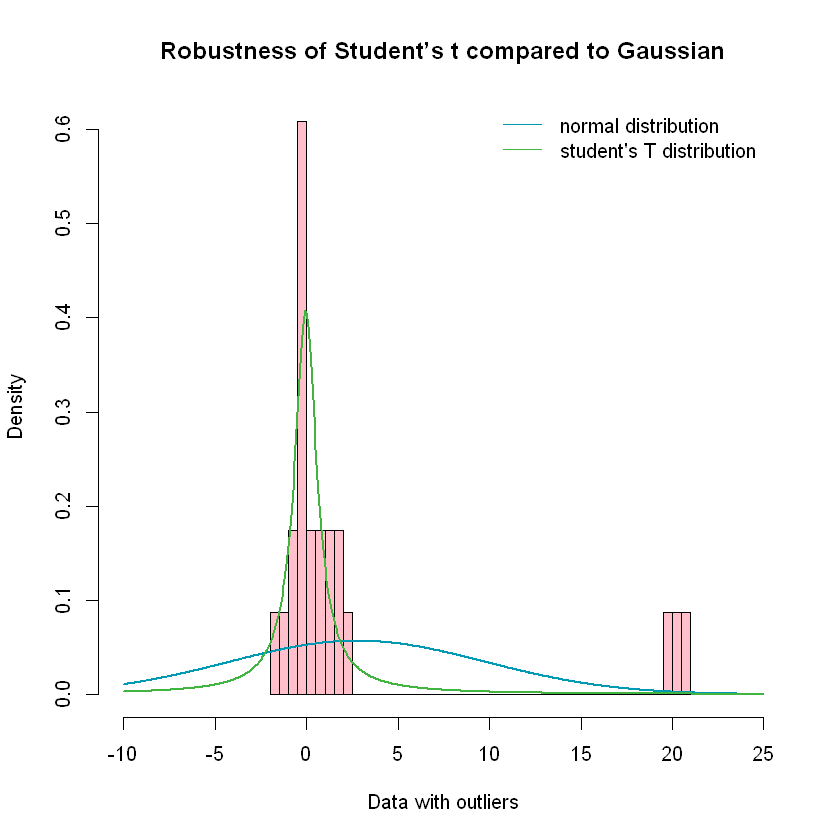

In [9]:
Gaussian_mle <- function(data){
        mean_mle <- mean(data)
        var_mle <- var(data)
        result <- list("mean"= mean_mle, "var" = var_mle)
        return(result)       
}


E_step <-function(X, mu, tau, dof){
        # dof: degrees of freedom, tau: precision = 1/ var
        d = X - mu
        a = 0.5 * (dof + 1)
        b = 0.5 * (dof + tau * d ** 2)
        E_eta = a / b
        E_lneta = digamma(a) - log(b)
        result <- list("E_eta"= E_eta, "E_lneta" = E_lneta)
        return(result)
}


M_step <-function(X, dof, E_eta, E_lneta, learning_rate){
        # class(X, eta)
        mu = sum(E_eta * X) / sum(E_eta)
        d = X - mu
        tau = 1 / mean(E_eta * d ** 2)
        N = length(X)
        dof = dof + learning_rate * 0.5 * (
                N * log(0.5 * dof) + N
                - N * digamma(0.5 * dof)
                + sum(E_lneta - E_eta))
        result <- list("mu"= mu, "tau" = tau, "dof" = dof)
        return(result)
        
}

StudentsT_pdf <- function(X, mu, tau, dof){
        d = X - mu
        D_sq = tau * d ** 2
        
        return(gamma(0.5 * (dof + 1)) * tau ** 0.5
               * (1 + D_sq / dof) ** (-0.5 * (1 + dof))
               / gamma(dof * 0.5) / (pi * dof) ** 0.5)        
}

# generate data

data1 <- rnorm(20, mean = 0, sd = 1)
outlier <- rnorm(3, mean = 20, sd = 1)
data2 <- c(data1, outlier)

# normal distri data
mean1 <- Gaussian_mle(data1)$mean
var1 <- Gaussian_mle(data1)$var

# normal distri data with outliers
mean2 <- Gaussian_mle(data2)$mean
var2 <- Gaussian_mle(data2)$var


# Fit for data without outliers
x <- seq(-10, 25, by=0.05)
y=Gaussian_pdf(x, var1, mean1)
hist(data1, freq = F,main = "Robustness of Student’s t compared to Gaussian", col = "pink",
      xlab="Data without outliers",xlim = c(-10,25))
lines(x, y,  type = "l", col = pal[1], lwd = 2)
X <- data1
mu0 = mean(X)
tau0 = 1 / var(X)
dof0 = 1

# EM for student T
repeat{
        # E step
        E_eta = E_step(X, mu0, tau0, dof0)$E_eta
        E_lneta = E_step(X, mu0, tau0, dof0)$E_lneta
        
        # M step
        new_param <- M_step(X, dof0, E_eta, E_lneta, learning_rate=0.01)
        diff1 <- new_param$mu - mu0
        diff2 <- new_param$tau - tau0
        diff3 <- new_param$dof -dof0
        allclose <- (diff1 < 0.00001) & (diff2 < 0.00001) & (diff3 < 0.00001)
        mu0 <- new_param$mu 
        tau0 <- new_param$tau 
        dof0 <- new_param$dof 
        if (allclose) break
}


x <- seq(-10, 25, by=0.05)
y <- StudentsT_pdf(x, mu0, tau0, dof0)
lines(x, y,  type = "l", col = pal[2], lwd = 2)

legend("topright", col = c(pal[1], pal[2]),
       bty = "n",lty = c(1, 1),
       legend = c("normal distribution", "student's T distribution"))

# fit for data with outliers
y=Gaussian_pdf(x, var2, mean2)
hist(data2,breaks = 50, freq = F,main = "Robustness of Student’s t compared to Gaussian", col = "pink",
     xlim = c(-10,25),  xlab="Data with outliers")

lines(x, y,  type = "l", col = pal[1], lwd = 2)


# initialize param for student T fit
X <- data2
mu0 = mean(X)
tau0 = 1 / var(X)
dof0 = 1

# EM for student T
repeat{
        # E step
        E_eta = E_step(X, mu0, tau0, dof0)$E_eta
        E_lneta = E_step(X, mu0, tau0, dof0)$E_lneta
        
        # M step
        new_param <- M_step(X, dof0, E_eta, E_lneta, learning_rate=0.01)
        diff1 <- new_param$mu - mu0
        diff2 <- new_param$tau - tau0
        diff3 <- new_param$dof -dof0
        allclose <- (diff1 < 0.00001) & (diff2 < 0.00001) & (diff3 < 0.00001)
        mu0 <- new_param$mu 
        tau0 <- new_param$tau 
        dof0 <- new_param$dof 
        if (allclose) break
}

print("Gaussian_mle result")
Gaussian_mle(data2)
print("Student T fit")
new_param


x <- seq(-10, 25, by=0.05)
y <- StudentsT_pdf(x, mu0, tau0, dof0)
lines(x, y,  type = "l", col = pal[2], lwd = 2)

legend("topright", col = c(pal[1], pal[2]),
       bty = "n",lty = c(1, 1),
       legend = c("normal distribution", "student's T distribution"))

### 2.3.9 Mixture of Gaussians

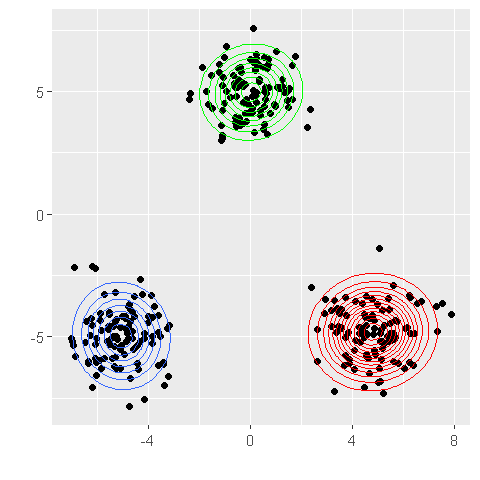

In [23]:
# generate data (-5,-5), (5,-5), (0,5)

rv <- rnorm(600,0,1)
rv11 <- rv[1:100]-5
rv12 <- rv[101:200]-5
rv21 <- rv[201:300]+5
rv22 <- rv[301:400]-5
rv31 <- rv[401:500]
rv32 <- rv[501:600]+5
rv <- c(rv11, rv21, rv31, rv12, rv22, rv32)
X <- matrix(rv, nrow = 300, ncol = 2, byrow = F)

# Use K-means to find the center of clusters as the means of Guassian Mixed Model
euc.dist <- function(X, Y) {
        d1 <- c()
        for (i in 1: nrow(X)){
                for (j in 1: nrow(Y)){
                        mat = rbind(X[i,],Y[j,])
                        d1 = c(d1, dist(mat))}}
        return(d1)
}

KMeans <- function(X, n_clusters, iter_max=100){
        
        I = diag(x = 1, nrow= n_clusters)
        index = sample(nrow(X), n_clusters, replace = FALSE)
        prev_idx <- c(X[index[1],1],X[index[1],2],X[index[2],1],X[index[2],2],X[index[3],1],X[index[3],2])
        centers = matrix(prev_idx, nrow = 3, ncol = 2, byrow = T)
        
        for (i in 1:iter_max){
                prev_centers = centers
                D = euc.dist(X, prev_centers)
                Dmat = matrix(D,nrow=nrow(X),byrow = T)
                cluster_index = apply(Dmat, 1, FUN=which.min)
                centers = diag(1/colSums(I[cluster_index,])) %*% (t(I[cluster_index,]) %*% X)
                if(isTRUE(all.equal(centers, prev_centers,tolerance = 1e-5)))
                {break}
        }
        return(centers)
}


compute_log_likelihood <- function(X, means, weights, covs, n_components){
    n_row = nrow(X)    
    resp = matrix(0, nrow = n_row, ncol = n_components)
        for(k in 1:n_components){
                prior = weights[k]
                likelihood = dmvnorm(X, means[k,], covs[,,k])
                resp[,k] = prior * likelihood
        }
        return(resp)
}


GMM_estep <- function(X, means, weights, covs, n_components){
        
        resp = compute_log_likelihood (X, means, weights, covs, n_components)
        log_likelihood = sum(log(rowSums(resp)))
        # normalize over all possible cluster assignments
        resp = resp /rowSums(resp)
        
        result <- list("log_likelihood"=log_likelihood, "resp"=resp)
        return(result)
}


GMM_mstep <- function(resp, X, n_components){
    
        # total responsibility assigned to each cluster, N^{soft}
        resp_weights = colSums(resp)
        # weights
        weights = resp_weights / nrow(X)
        # means
        weighted_sum = t(resp) %*% X
        means = weighted_sum / resp_weights
        # covariance
        covs = array( cov(X),dim = c(ncol(X),ncol(X), n_components) )
        for(k in 1:n_components){
                diff = t(sweep(X, 2, means[k,],"-"))
                weighted_sum = sweep(diff,2,resp[,k],"*") %*% t(diff)
                covs[,,k]= weighted_sum / resp_weights[k]
        }
        
        result <- list("means"=means, "covs"=covs, "weights" = weights)
        return(result)
}




GaussianMix_fit <- function(X, n_components, n_iters, tol){
        # data's dimensionality and responsibility vector
        n_row = nrow(X)
        n_col = ncol(X) 
        resp = matrix(0, nrow = n_row, ncol = n_components)
        # # initialize parameters
        set.seed(1)
        covs = array( cov(X),dim = c(n_col, n_col, n_components) )
        means = KMeans(X, n_clusters=n_components, iter_max=100)
        weights = matrix(1/n_components, nrow = n_components, ncol = 1)
        
        log_likelihood = 0
        log_likelihood_trace = c()
        
        for (i in 1:n_iters){
                # E step
                log_likelihood_new = GMM_estep(X, means, weights, covs, n_components)$log_likelihood
                resp = GMM_estep(X, means, weights, covs,n_components)$resp
                
                # M step
                means = GMM_mstep(resp, X, n_components)$means
                covs = GMM_mstep(resp, X, n_components)$covs
                weights = GMM_mstep(resp, X, n_components)$weights
                
                if (abs(log_likelihood_new - log_likelihood) <= tol){
                        break
                }
                log_likelihood = log_likelihood_new
                log_likelihood_trace = c(log_likelihood_trace,log_likelihood)
        }
        
        result <- list("means"=means, "covs"=covs, "weights" = weights, "log_likelihood_trace" = log_likelihood_trace)
        return(result)
}

gmm <- GaussianMix_fit(X, n_components=3, n_iters=300, tol=1e-5)

set.seed(13)


mu1 = gmm$means[1,]
mu2 = gmm$means[2,]
mu3 = gmm$means[3,]
sigma1 <- gmm$covs[,,1]
sigma2 <- gmm$covs[,,2]
sigma3<- gmm$covs[,,3]
data.grid <- expand.grid(s.1 = seq(-15, 15, length.out=200), 
                         s.2 = seq(-15, 15, length.out=200))

q3.samp = cbind(data.grid, prob = dmvnorm(data.grid, mean = mu3, sigma=sigma3))
q2.samp = cbind(data.grid, prob = dmvnorm(data.grid, mean = mu2, sigma=sigma2))
q1.samp = cbind(data.grid, prob = dmvnorm(data.grid, mean = mu1, sigma=sigma1))

options(repr.plot.width=4,repr.plot.height=4)
ggplot(data.frame(X), aes(x=data.frame(X)[,1], y=data.frame(X)[,2])) + geom_point()+ 
        geom_contour(data=q1.samp,aes(x=s.1,y=s.2,z=prob)) +    
        geom_contour(data=q2.samp,aes(x=s.1,y=s.2,z=prob),col="red")+
        geom_contour(data=q3.samp,aes(x=s.1,y=s.2,z=prob),col="green") + labs(x = "",y = "")

